Progressive Passes:  AFC Bournemouth (1) vs. Chelsea (4) April 2016 

- StatsMuse has Cesc Fabregas as having the most passes in the 2015/16 Season. (https://www.statmuse.com/fc/ask/most-progressive-pass-in-the-premier-league-2016)
- WAGNH (a Chelsea supporter website) has his highest career match rating (9.6) in a 4-1 away win against Bournemouth in 2016. We will analyse his progressive passes in this match.
- We will use Opta Analyst's definition of a progressive pass. This means the pass originated in the attacking 2/3 of the pitch and moves the ball 25% (or more) closer to the goal. (https://theanalyst.com/articles/what-you-didnt-know-about-premier-league-passing)

In [120]:
import numpy as np 
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [121]:
free_competitions = sb.competitions()
free_competitions = free_competitions[(free_competitions['competition_gender'] == 'male') & (free_competitions['country_name'] == 'England')]

In [122]:
free_competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2025-04-23T14:36:29.347042,2021-06-13T16:17:31.694,NaN,2025-04-23T14:36:29.347042
65,2,44,England,Premier League,male,False,False,2003/2004,2025-06-24T13:53:07.585114,2021-06-13T16:17:31.694,NaN,2025-06-24T13:53:07.585114


In [123]:
season_matches = sb.matches(competition_id=2, season_id=27)
match = season_matches[(season_matches['away_team'] == 'Chelsea')]

In [124]:
events = sb.events(match_id=3754242)

In [125]:
events.head(10)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4411, 'lineup': [{'player': {'id...",AFC Bournemouth,28,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Chelsea,33,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.407,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.807,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:01.712,Pass,True
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:05.768,Pass,NaN


Examining the column names, we identify the relevant columns as:'player', 'type', 'pass_type', 'location', 'pass_end_location'.

In [126]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswi

In [127]:
events = events[['player', 'type', 'pass_type', 'location', 'pass_end_location', 'pass_outcome']]
events.pass_type.unique()

<ArrowStringArray>
[           nan,     'Kick Off',     'Recovery',     'Throw-in',
    'Free Kick', 'Interception',    'Goal Kick',       'Corner']
Length: 8, dtype: str

Looking at the pass types, we can see that 'Throw-in' is included. We need to exclude this. 

In [128]:
events.head(10)

,player,type,pass_type,location,pass_end_location,pass_outcome
0,NaN,Starting XI,NaN,NaN,NaN,NaN
1,NaN,Starting XI,NaN,NaN,NaN,NaN
2,NaN,Half Start,NaN,NaN,NaN,NaN
3,NaN,Half Start,NaN,NaN,NaN,NaN
4,NaN,Half Start,NaN,NaN,NaN,NaN
5,NaN,Half Start,NaN,NaN,NaN,NaN
6,Diego da Silva Costa,Pass,Kick Off,"[60.0, 40.0]","[60.7, 38.1]",NaN
7,Willian Borges da Silva,Pass,NaN,"[58.2, 37.7]","[53.6, 38.1]",NaN
8,Francesc Fàbregas i Soler,Pass,NaN,"[54.8, 37.7]","[42.4, 66.1]",NaN
9,César Azpilicueta Tanco,Pass,NaN,"[47.3, 64.8]","[109.6, 3.6]",Incomplete


In [129]:
passes = events[(events['type'] == 'Pass') & (events['pass_type'] != 'Throw-in')]
passes.head()

,player,type,pass_type,location,pass_end_location,pass_outcome
6,Diego da Silva Costa,Pass,Kick Off,"[60.0, 40.0]","[60.7, 38.1]",NaN
7,Willian Borges da Silva,Pass,NaN,"[58.2, 37.7]","[53.6, 38.1]",NaN
8,Francesc Fàbregas i Soler,Pass,NaN,"[54.8, 37.7]","[42.4, 66.1]",NaN
9,César Azpilicueta Tanco,Pass,NaN,"[47.3, 64.8]","[109.6, 3.6]",Incomplete
10,Branislav Ivanović,Pass,NaN,"[21.7, 5.0]","[46.5, 15.8]",NaN


In [130]:
fabregas_passes = passes[passes['player'] == 'Francesc Fàbregas i Soler']
fabregas_passes.pass_outcome.unique()

<ArrowStringArray>
[nan, 'Incomplete', 'Pass Offside', 'Out']
Length: 4, dtype: str

We need to find the (x,y) start position of the passes, the (x,y) final position of the passses. 

In [131]:
fabregas_passes['x_start'] = fabregas_passes['location'].str[0]
fabregas_passes['y_start'] = fabregas_passes['location'].str[1]

fabregas_passes['x_end'] = fabregas_passes['pass_end_location'].str[0]
fabregas_passes['y_end'] = fabregas_passes['pass_end_location'].str[1]

#Tidy the dataset a little 
fabregas_passes.drop(columns=['location', 'pass_end_location'])

,player,type,pass_type,pass_outcome,x_start,y_start,x_end,y_end
8,Francesc Fàbregas i Soler,Pass,NaN,NaN,54.8,37.7,42.4,66.1
74,Francesc Fàbregas i Soler,Pass,NaN,NaN,73.2,37.5,105.1,47.8
101,Francesc Fàbregas i Soler,Pass,NaN,NaN,63.7,62.4,74.0,60.8
103,Francesc Fàbregas i Soler,Pass,NaN,NaN,66.7,63.2,67.1,50.2
116,Francesc Fàbregas i Soler,Pass,Recovery,Incomplete,45.6,19.2,50.3,48.6
...,...,...,...,...,...,...,...,...
1034,Francesc Fàbregas i Soler,Pass,NaN,NaN,101.4,18.3,98.9,14.0
1036,Francesc Fàbregas i Soler,Pass,NaN,NaN,100.7,18.7,104.7,19.0
1050,Francesc Fàbregas i Soler,Pass,NaN,NaN,34.2,53.5,22.6,51.0
1052,Francesc Fàbregas i Soler,Pass,Free Kick,NaN,41.7,17.7,34.5,53.3


We must then calculate 2 new variables: 1. The distance between where the pass started and the goal, 2. The distance between where the pass finished and the goal. 
We can calculate the distance between 2 points using the distance formula: 
      d = √( (x_2 - x_1)^2 + (y_2 - y_1)^2 ), we will use (x2,y2) = (120, 40) as these are the coordinates of the goal in mplsoccer pitch

In [132]:
x_start = fabregas_passes['x_start']
y_start = fabregas_passes['y_start']

x_end = fabregas_passes['x_end']
y_end = fabregas_passes['y_end']

fabregas_passes['start_distance'] = np.sqrt( (120 - x_start)**2 + (40 - y_start)**2)
fabregas_passes['end_distance'] = np.sqrt( (120 - x_end)**2 + (40 - y_end)**2)
fabregas_passes.head()

,player,type,pass_type,location,pass_end_location,pass_outcome,x_start,y_start,x_end,y_end,start_distance,end_distance
8,Francesc Fàbregas i Soler,Pass,NaN,"[54.8, 37.7]","[42.4, 66.1]",NaN,54.8,37.7,42.4,66.1,65.240555,81.871668
74,Francesc Fàbregas i Soler,Pass,NaN,"[73.2, 37.5]","[105.1, 47.8]",NaN,73.2,37.5,105.1,47.8,46.866726,16.818145
101,Francesc Fàbregas i Soler,Pass,NaN,"[63.7, 62.4]","[74.0, 60.8]",NaN,63.7,62.4,74.0,60.8,60.592491,50.484057
103,Francesc Fàbregas i Soler,Pass,NaN,"[66.7, 63.2]","[67.1, 50.2]",NaN,66.7,63.2,67.1,50.2,58.130285,53.874391
116,Francesc Fàbregas i Soler,Pass,Recovery,"[45.6, 19.2]","[50.3, 48.6]",Incomplete,45.6,19.2,50.3,48.6,77.252832,70.228555


To be a progressive pass, the pass mustbe succesful, originate in the attacking 2/3 of the pitch and move the ball 25% (or more) closer to the goal. The next bit of code will filter for the first two criteria. 
  - Previously we saw there are 4 types of pass outcomes. The succesful ones are null. 
  - To be in the attacking two thirds, the x variable must be >= 40. 

In [133]:
fabregas_passes = fabregas_passes[(fabregas_passes['pass_type'].isnull()) & (fabregas_passes['x_start'] >= 40)]
fabregas_passes.head()

,player,type,pass_type,location,pass_end_location,pass_outcome,x_start,y_start,x_end,y_end,start_distance,end_distance
8,Francesc Fàbregas i Soler,Pass,NaN,"[54.8, 37.7]","[42.4, 66.1]",NaN,54.8,37.7,42.4,66.1,65.240555,81.871668
74,Francesc Fàbregas i Soler,Pass,NaN,"[73.2, 37.5]","[105.1, 47.8]",NaN,73.2,37.5,105.1,47.8,46.866726,16.818145
101,Francesc Fàbregas i Soler,Pass,NaN,"[63.7, 62.4]","[74.0, 60.8]",NaN,63.7,62.4,74.0,60.8,60.592491,50.484057
103,Francesc Fàbregas i Soler,Pass,NaN,"[66.7, 63.2]","[67.1, 50.2]",NaN,66.7,63.2,67.1,50.2,58.130285,53.874391
142,Francesc Fàbregas i Soler,Pass,NaN,"[46.3, 16.4]","[88.0, 16.4]",NaN,46.3,16.4,88.0,16.4,77.386368,39.761288


Next, we will filter for passes which moved the ball 25% or more closer to the goal. 
To calculate this, we do: 
      (start_distance - end_distance) / (start_distance), we then use only those where this value >= 0.25 (25%)

In [134]:
progression_mask = ((fabregas_passes['start_distance'] -  (fabregas_passes['end_distance'])) / fabregas_passes['start_distance'])
fabregas_passes = fabregas_passes[((fabregas_passes['start_distance'] -  (fabregas_passes['end_distance'])) / fabregas_passes['start_distance']) >= 0.25]
fabregas_passes.head()



,player,type,pass_type,location,pass_end_location,pass_outcome,x_start,y_start,x_end,y_end,start_distance,end_distance
74,Francesc Fàbregas i Soler,Pass,NaN,"[73.2, 37.5]","[105.1, 47.8]",NaN,73.2,37.5,105.1,47.8,46.866726,16.818145
142,Francesc Fàbregas i Soler,Pass,NaN,"[46.3, 16.4]","[88.0, 16.4]",NaN,46.3,16.4,88.0,16.4,77.386368,39.761288
263,Francesc Fàbregas i Soler,Pass,NaN,"[53.8, 36.0]","[91.9, 78.8]",Out,53.8,36.0,91.9,78.8,66.320736,47.906680
523,Francesc Fàbregas i Soler,Pass,NaN,"[74.7, 54.1]","[108.3, 49.6]",NaN,74.7,54.1,108.3,49.6,47.443651,15.134398
662,Francesc Fàbregas i Soler,Pass,NaN,"[83.6, 41.4]","[92.9, 37.8]",NaN,83.6,41.4,92.9,37.8,36.426913,27.189152


In [135]:
prog_start_x = fabregas_passes['x_start']
prog_start_y = fabregas_passes['y_start']
prog_end_x = fabregas_passes['x_end']
prog_end_y = fabregas_passes['y_end']

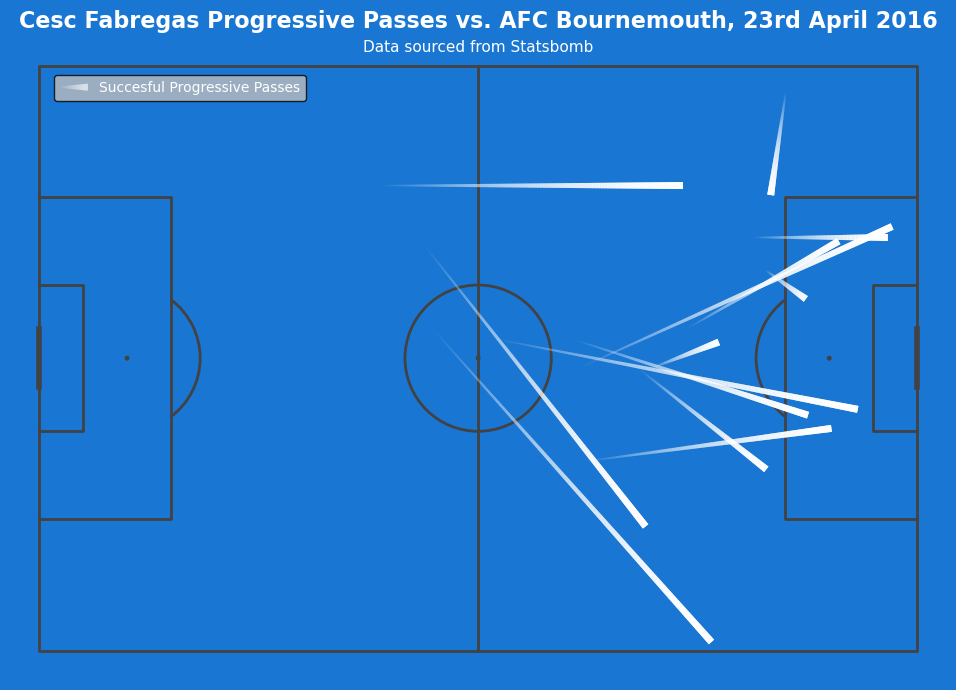

<Figure size 640x480 with 0 Axes>

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#1976D2', line_color='#424242')
fig, ax = pitch.draw(figsize=(14, 7)) 
fig.set_facecolor('#1976D2')
pitch.lines(prog_start_x, prog_start_y, prog_end_x, prog_end_y, comet=True, transparent=True,  label= 'Succesful Progressive Passes', color='white', ax=ax)
ax.legend(loc=0, edgecolor = 'black', facecolor = '#BDBDBD', labelcolor = 'white', bbox_to_anchor=(0.04, 0.95))
ax.set_title("Cesc Fabregas Progressive Passes vs. AFC Bournemouth, 23rd April 2016", fontsize=16, fontweight = 'bold', color = 'white')
ax.text(60, -2.5, "Data sourced from Statsbomb", va='center', ha='center', color='white', fontsize=11)
plt.savefig("fabregas_progressive_passes.png")
plt.show()
plt.clf()